In [ ]:
#Random Forest Classification, decision tree classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To buy or not to buy?

This dataset contains information about the age, gender and annual salary of people interested in buying in car and whether or not they bought the car. The data will be used to train a model to help predict if future customers will buy the car or not.  

### The trained model
The model trained below can be used to predicted whether or not someone will purchase a car based on their age and annual salary. This can be useful in a number of ways. For example, a car dealership can use this model to predict whether a potential customer is likely to purchase a car based on their age and salary, and then target their advertising and sales efforts accordingly. This can help the dealership to more efficiently allocate their resources and increase their sales. Similarly, an auto manufacturer can use this model to gain insights into their target market and tailor their product offerings to better meet the needs of their customers.

In [3]:
df = pd.read_csv('car_data.csv')

In [34]:
display(df.head(5))

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [35]:
X = df.iloc[:400, [2,3]].values
y = df.iloc[:400, -1].values
print(X)

[[    35  20000]
 [    40  43500]
 [    49  74000]
 [    40 107500]
 [    25  79000]
 [    47  33500]
 [    46 132500]
 [    42  64000]
 [    30  84500]
 [    41  52000]
 [    42  80000]
 [    47  23000]
 [    32  72500]
 [    27  57000]
 [    42 108000]
 [    33 149000]
 [    35  75000]
 [    35  53000]
 [    46  79000]
 [    39 134000]
 [    39  51500]
 [    49  39000]
 [    54  25500]
 [    41  61500]
 [    31 117500]
 [    24  58000]
 [    40 107000]
 [    40  97500]
 [    48  29000]
 [    38 147500]
 [    45  26000]
 [    32  67500]
 [    37  62000]
 [    41  79500]
 [    44 113500]
 [    47  41500]
 [    38  55000]
 [    39 114500]
 [    42  73000]
 [    26  15000]
 [    21  37500]
 [    59  39500]
 [    39  66500]
 [    43  80500]
 [    49  86000]
 [    37  75000]
 [    49  76500]
 [    28 123000]
 [    59  48500]
 [    40  60500]
 [    38  99500]
 [    51  35500]
 [    55 130000]
 [    23  56500]
 [    49  43500]
 [    49  36000]
 [    48  21500]
 [    49  98500]
 [    43  5950

In [36]:
sampled_df = df.sample(n=400)
X = sampled_df.iloc[:, [2,3]].values
y = sampled_df.iloc[:, -1].values
print(X)

[[    41  71000]
 [    20  49000]
 [    30  29500]
 [    39  72500]
 [    19  87500]
 [    31  63500]
 [    48 119000]
 [    53 143000]
 [    33 151500]
 [    42  60500]
 [    18  44000]
 [    55 116500]
 [    36  40500]
 [    51 140500]
 [    26  15000]
 [    32 117000]
 [    48  21500]
 [    23  28500]
 [    33 136500]
 [    29  43000]
 [    30  15000]
 [    39  81500]
 [    18  52000]
 [    37 127500]
 [    38  58500]
 [    35  75000]
 [    39  71000]
 [    38  79500]
 [    40  60000]
 [    26  17000]
 [    59 106500]
 [    56 131500]
 [    25  33500]
 [    43 109500]
 [    30  89000]
 [    42  80000]
 [    21  72000]
 [    54  26000]
 [    43 133000]
 [    31  90500]
 [    27  44500]
 [    27  20000]
 [    24  29500]
 [    31  16500]
 [    40  79500]
 [    28  90500]
 [    37  53500]
 [    36  80500]
 [    45  75500]
 [    40  57000]
 [    28  55500]
 [    33  60000]
 [    33  69000]
 [    19  19000]
 [    26  43000]
 [    51 136500]
 [    41  48500]
 [    60  42000]
 [    27  5350

In [37]:
#splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [38]:
#feature scaling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
classifier = LogisticRegression()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = y_train.ravel()
classifier.fit(X_train, y_train)

LogisticRegression()

In [39]:
print(X_train)

[[ 1.86185204  2.03821389]
 [ 0.10108128 -0.01879763]
 [ 0.10108128 -0.31265642]
 [ 0.00326069 -0.4385959 ]
 [-0.77930409 -1.53007141]
 [ 0.29672248  1.03069804]
 [-0.6814835   0.80680563]
 [ 1.56839025  0.94673839]
 [ 0.88364606 -1.15225296]
 [-0.3880217   0.02318219]
 [-1.26840708  0.2470746 ]
 [ 1.07928726  0.72284598]
 [ 0.19890188 -0.52255556]
 [-0.09455991  0.2470746 ]
 [-0.3880217  -0.59252194]
 [-0.77930409  0.0791553 ]
 [ 0.88364606 -1.06829331]
 [ 0.00326069 -0.4385959 ]
 [-1.75751007 -1.54406468]
 [-1.26840708  0.6528796 ]
 [-0.29020111  2.05220717]
 [-2.05097186 -1.44611175]
 [ 1.07928726  1.70237528]
 [ 1.27492845 -1.40413193]
 [-0.3880217   0.10714185]
 [-0.5836629  -1.20822607]
 [-2.14879246 -0.57852866]
 [-0.29020111  0.06516202]
 [-0.29020111 -0.29866315]
 [-0.3880217  -0.34064297]
 [-0.4858423  -1.4740983 ]
 [-0.4858423  -0.3826228 ]
 [-0.09455991  0.12113512]
 [-0.77930409  1.32455683]
 [ 0.00326069  0.27506116]
 [-0.3880217   1.46448959]
 [ 1.47056965 -1.26419917]
 

In [40]:
print(classifier.predict(sc.transform([[49, 74000]])))

[1]


In [41]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]]


### The model was trained using a training and test set and the outcome of the confusion matrix is as follows:

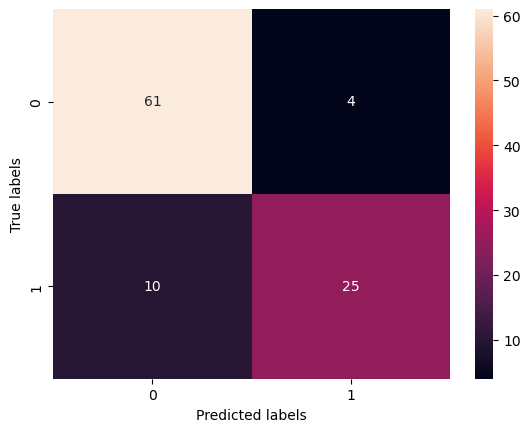

[[61  4]
 [10 25]]
Accuracy: 0.860


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(f'Accuracy: {accuracy:.3f}')



### The result shows 4 false positives, 10 false negatives and a accuracy of 86%, which is a good score, since this problem doesn't require a very high precision. 

### Random Forest Classification

The colored background shows the predicted class for each point in the graph. The dots in the foreground represent the training data points and their color shows their true class. The line in the middle divides the graph into two parts for each class. The picture gives us an idea about how good the tool is at predicting data and how it might work on new data. The legend tells us which color represents which class.





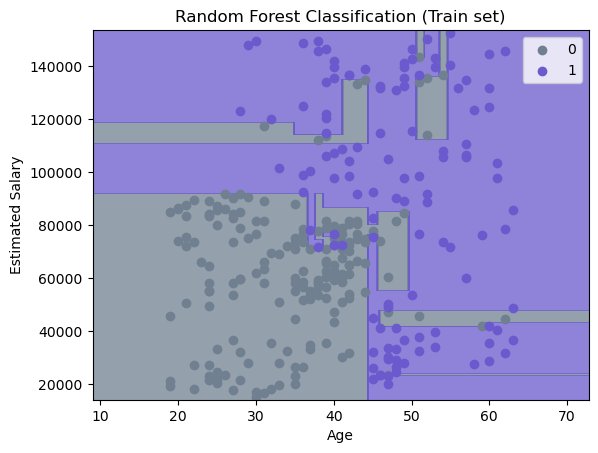

In [79]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('slategrey', 'slateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('slategrey', 'slateblue'))(i), label = j)
plt.title('Random Forest Classification (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

This plot shows how well the Random Forest model can tell the difference between the two classes in the test data. It provides a visual representation of the decision boundary that separates the two classes in the feature space. The dots represent the test data points, and their color indicates their true class label. The plot helps us understand how good the model is at correctly predicting the class labels, and where it might make mistakes. The legend tells us which color represents each class.

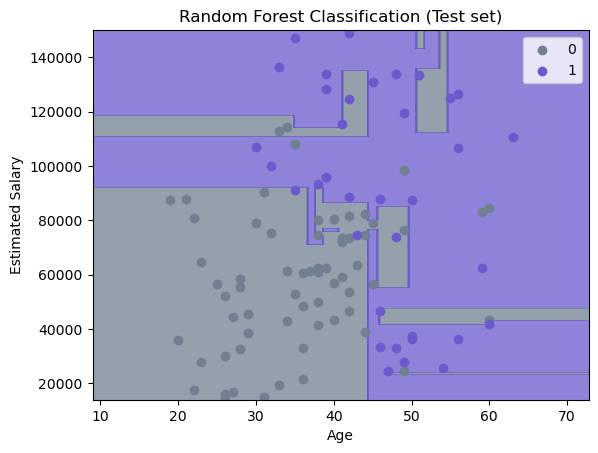

In [72]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('slategrey', 'slateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('slategrey', 'slateblue'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Probability
We can now use the trained model to predict whether or not someone will purchase a car based on their age and annual salary. The model is used to predict if 43 year old customer X with an annual salary of 43000

In [80]:
# create a new data point to predict
new_data = [[35, 50000]]

# scale the new data using the same scaler used on the training data
new_data_scaled = sc.transform(new_data)

# make a prediction using the trained classifier
prediction = classifier.predict(new_data_scaled)

print(prediction)


[0]


The outcome "0" indicates that it is predicted that this customer X will not buy the car.

New prediction for 6 (potential) new customers:

In [83]:
new_data_2 = [[35, 50000], [42, 15700], [51, 65000], [23, 45600], [36, 42000], [41, 72000]]
df = pd.DataFrame(new_data_2, columns=[ 'Age', 'Annual Salary'])
df.index = df.index + 1
display(df)


,Age,Annual Salary
1,35,50000
2,42,15700
3,51,65000
4,23,45600
5,36,42000
6,41,72000


In [89]:
from tabulate import tabulate

results = []

for i, data in enumerate(new_data_2):
    # scale the new data using the same scaler used on the training data
    data_scaled = sc.transform([data])
    
    # make a prediction using the trained classifier
    prediction = classifier.predict(data_scaled)
    
    # add the results to the table
    if prediction == 1:
        prediction_text = "Yes"
    else:
        prediction_text = "No"
    results.append([i+1, data[0], data[1], prediction_text])

# print the table
headers = ["Customer", "Age", "Annual Salary", "Prediction"]
print(tabulate(results, headers=headers))


  Customer    Age    Annual Salary  Prediction
----------  -----  ---------------  ------------
         1     35            50000  No
         2     42            15700  No
         3     51            65000  Yes
         4     23            45600  No
         5     36            42000  No
         6     41            72000  No


This table shows that only customer 3 is expected to buy a car.